<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/DNN/DNN_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento de uma Deep Neural Network

###  Carregando dados

In [9]:
#!mkdir images
#!mkdir data
#!cp *.csv data
from google.colab import files
files.upload()
!cp *.jpg images
!cp *.png images
!cp *.gif

Saving saddle_point_evaluation_optimizers.gif to saddle_point_evaluation_optimizers.gif
Saving z-score.png to z-score.png
Saving one-hot.png to one-hot.png
Saving tanh.png to tanh.png
Saving higher-dimensions-classification.png to higher-dimensions-classification.png
Saving binary-classification.png to binary-classification.png
Saving abstract_nn.png to abstract_nn.png
Saving ann_class_reg.png to ann_class_reg.png
Saving ann.png to ann.png
Saving bias_value.png to bias_value.png
Saving bias_weight.png to bias_weight.png
Saving contours_evaluation_optimizers.gif to contours_evaluation_optimizers.gif
Saving deriv_sigmoid.png to deriv_sigmoid.png
Saving deriv.png to deriv.png
Saving errors.png to errors.png
Saving kfold.png to kfold.png
Saving momentum.png to momentum.png
Saving relu.png to relu.png
Saving roc.png to roc.png
Saving sgd_error.png to sgd_error.png
Saving sigmoid.png to sigmoid.png
Saving spec_cut.png to spec_cut.png
Saving t1vst2.png to t1vst2.png
Saving train_val.png to tr

In [11]:
!ls images

abstract_nn.png			      one-hot.png
ann_class_reg.png		      relu.png
ann.png				      roc.png
bias_value.png			      sgd_error.png
bias_weight.png			      sigmoid.png
binary-classification.png	      spec_cut.png
deriv.png			      t1vst2.png
deriv_sigmoid.png		      tanh.png
errors.png			      training_val.png
higher-dimensions-classification.png  train_val.png
kfold.png			      z-score.png
momentum.png


Apesar das vantagens computacionais e de ser um modelo mais aproximado do cérebro, o treinamento de redes neurais profundas era uma tarefa de difícil execução até uma década atrás, devido a dois complicadores principais. O primeiro deles é conhecido como a dissipação dos gradientes (vanishing gradients), que é causado por unidades que estão saturadas. Durante a aplicação do algoritmo de retropropagação, o gradiente da ativação de cada unidade oculta é calculado e utilizado como um termo multiplicativo para atualização dos pesos correspondentes. Entretanto se a unidade em questão está próxima da saturação, então a derivada parcial resultante será um valor próximo de zero. Isso faz com que o gradiente com relação às pré-ativações seja também próximo de zero, porque seu cálculo envolve a multiplicação pela derivada parcial. Isso significa que o gradiente retropropagado para as camadas anteriores será cada vez mais próximo de zero, de tal forma que quanto mais próximo à camada de entrada, maior a quantidade de gradientes próximos de zero. Como resultado, à medida que o gradiente do erro é retropropagado seu valor decresce exponencialmente, de tal forma que o aprendizado nas camadas mais próximas à entrada se torna muito lento. Esse problema afeta não apenas o aprendizado em redes profundas alimentadas adiante (Feed Forward), mas também em redes recorrentes (RNNs). O segundo complicador é consequência do número maior de parâmetros para adequar (os parâmetros de uma rede neural são seus pesos, e quanto mais camadas, mais pesos). De fato, quanto maior a quantidade de parâmetros a ajustar em um modelo, maior o risco de overfitting.

O aprendizado de modelos por meio do treinamento de redes neurais profundas tem sido tradicionalmente tratado como um processo empírico. De fato, soluções envolvem o uso de diversos procedimentos que foram surgindo ao longo dos anos e que em conjunto passaram a contar como fatores importantes no sucesso da aprendizagem profunda (além do aumento do poder computacional, da disponibilidade de grandes conjuntos de dados e de melhores arquiteturas de rede). Vamos agora, descrever o procedimentos cujo propósito é treinar redes neurais profundas de forma adequada, seja diminuindo o tempo de treinamento, seja diminuindo o erro de generalização dos modelos resultantes.

## Construindo um Vetor de Features (atributos)

As redes neurais exigem que suas entradas sejam um número fixo de colunas. Isso é muito semelhante aos dados de uma planilha. Esta entrada deve ser completamente numérica.

É importante representar os dados de forma a que a rede neural possa se formar a partir deles. Vejamos quais são algumas das formas mais básicas de transformar dados para uma rede neural, começando pelos possíveis tipos de dados:

* Dados do Tipo Caracter (strings)
    * **Nominal** - Itens discretos individuais, sem ordem. Por exemplo: cor, código postal, forma.
    * **Ordinal** - Itens discretos individuais que podem ser ordenados. Por exemplo: nível de classificação, título do trabalho, tamanho de uma roupa (pequeno, médio, grande)
    
    
* Dados Numéricos
    * **Interval** - Valores numéricos, início não definido. Por exemplo, a temperatura. Você nunca diria "ontem foi duas vezes mais quente do que hoje".
    * **Ratio** - Valores numéricos, início claramente definido. Por exemplo, a velocidade. Você diria que "O primeiro carro está indo duas vezes mais rápido do que o segundo".

Abaixo você vai encontrar várias funções úteis para codificar o vetor de recursos para vários tipos de dados. 

* **encode_text_dummy** - Encoding de campos de texto, como as espécies de íris como um único campo para cada classe. Três classes se tornariam "0,0,1" "0,1,0" e "1,0,0". Podemos fazer o encoding dos preditores não-alvo dessa maneira. Bom para dados nominais.
* **encode_text_index** - Encoding dos campos de texto, como um único campo numérico como "0" "1" e "2". Bom para dados nominais.
* **encode_numeric_zscore** - Encoding dos valores numéricos com um escore z. As redes neurais lidam bem com os campos "centrados", o zscore geralmente é um bom ponto de partida para o intervalo / proporção.

* Os valores ordinais podem ser codificados com as funções dummy ou index. Mais tarde, veremos um meio mais avançado de encoding *

Tratamento de dados missing:

* **missing_median** - Preenche todos os valores faltantes com o valor médio.

Criando o vetor final de recursos:

* **to_xy** - Uma vez que todos os campos são numéricos, esta função pode fornecer as matrizes x e y que são usadas para caber na rede neural.

Outras funções de utilidade:

* **hms_string** - Imprima uma sequência de tempo decorrido.
* **chart_regression** - Exibe um gráfico para mostrar o quão bem uma regressão executa.

## Normalização

Normalmente, os dados são dimensionados para um intervalo específico em um processo chamado normalização. 

Uma transformação usual durante o treinamento de uma RNA é normalizar o conjunto de dados de treinamento de acordo com a distribuição normal padrão (i.e., média igual a zero e variância igual a 1) para evitar problemas de comparação devido às diferentes escalas usadas nos dados. Ocorre que durante a passagem dos exemplos normalizados através das
camadas da rede, esses valores são novamente transformados (por meio das pré-ativações e ativações), podendo fazer com que os dados de entrada de algumas camadas ocultas fiquem desnormalizados novamente. Esse problema, conhecido como mudança de co-variável interna (internal covariate shift), é tanto mais grave quanto mais profunda for a rede a ser treinada. Esse problema aumenta o tempo de treinamento porque implica na definição de uma taxa de aprendizagem pequena, além de propiciar a dissipação dos gradientes.

A Normalização em Lote (Batch Normalization) é um mecanismo proposto recentemente para resolver o problema acima, e que consiste em normalizar os dados fornecidos a cada camada oculta. A normalização é aplicada em cada mini-lote (como já fizemos em exemplos anteriores), para aumentar a eficiência durante a aplicação da transformação. De acordo com os experimentos realizados pelos autores da técnica (link na seção de links úteis), ela também produz um efeito de regularização sobre o treinamento, em alguns casos eliminando a necessidade de aplicar o desligamento (Dropout). Uma aceleração significativa do tempo de treinamento também foi observada, resultante da diminuição de 14 vezes na quantidade de passos de treinamento necessários, quando comparada ao tempo de treinamento sem o uso da normalização.

Existem muitas maneiras diferentes de normalizar os dados. Vejamos algumas delas:

### One Hot Encoding

Se você tem um valor categórico, como a espécie de uma íris, a marca de um automóvel ou a etiqueta de dígitos no conjunto de dados MNIST, você deve usar uma codificação One-Hot Encoding. Para codificar dessa maneira, você usaria um neurônio de saída para cada classe no problema. Lembra do conjunto de dados MNSIT que já usamos em outras oportunidades, onde você tem imagens para dígitos entre 0 e 9? Este problema é mais comumente codificado como dez neurônios de saída com uma função de ativação softmax que dá a probabilidade de a entrada ser um desses dígitos. Usando a codificação One-Hot, os dez dígitos podem ser codificados da seguinte maneira:

![One-Hot Encoding](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/one-hot.png?raw=true "One-Hot Encoding")

One-Hot Encoding sempre deve ser usado quando as classes não têm ordenação. Outro exemplo desse tipo de codificação é a marca de um automóvel. Normalmente, a lista de fabricantes de automóveis não está ordenada, a menos que exista algum significado que você deseja transmitir. Por exemplo, você pode encomendar as montadoras pelo número de anos de negócios. No entanto, esta classificação só deve ser feita se o número de anos de negócios tiver significado no seu problema. Se realmente não há ordem, então One-Hot deve sempre ser usado. Como você pode facilmente converter os dígitos, você pode se perguntar por que usamos uma codificação One-Hot. No entanto, a ordem dos dígitos não significa que o programa possa reconhecê-los. O fato de que "1" e "2" estarem numericamente próximos um do outro não ajuda o programa a reconhecer a imagem. Portanto, não devemos usar um neurônio de saída único que simplesmente exiba o dígito reconhecido. Os dígitos 0-9 são categorias, e não valores numéricos reais. 

As categorias de codificação com um único valor numérico prejudicam o processo de decisões da rede neural. Tanto a entrada como a saída podem usar One-Hot Encoding. A lista acima usou 0 's e 1' s. Normalmente você usará a unidade linear retificada (ReLU) e a ativação do softmax. No entanto, se você estiver trabalhando com uma função de ativação hiperbólica tangente, você deve utilizar um valor de -1 para os 0 para coincidir com o intervalo da hiperbólica tangente de -1 a 1.

Se você tem um número extremamente grande de classes, One-Hot Encoding pode tornar-se complicado porque você deve ter um neurônio para cada classe. Nesses casos, você tem várias opções. Primeiro, você pode encontrar uma maneira de pedir suas categorias. Com esta ordem, suas categorias agora podem ser codificadas como um valor numérico, que seria a posição da categoria atual dentro da lista ordenada. Outra abordagem para lidar com um número extremamente grande de categorias é a codificação de frequência de documento inversa (TF-IDF) porque cada classe se torna essencialmente a probabilidade de ocorrência dessa classe em relação às demais. Desta forma, o TF-IDF permite que o programa mapeie um grande número de classes para um único neurônio. 

## Range

Se você tem um número real ou uma lista ordenada de categorias, você pode escolher a normalização de range, pois simplesmente mapeia o intervalo de dados de entrada no alcance de sua função de ativação. Sigmoid, ReLU e softmax usam um intervalo entre 0 e 1, enquanto a tangente hiperbólica usa um intervalo entre -1 e 1.

Para executar a normalização, é necessário que os valores altos e baixos dos dados sejam normalizados. Da mesma forma, você precisa de valores altos e baixos para normalizar (geralmente 0 e 1). Às vezes você precisará desfazer a normalização realizada em um número e retorná-lo para um estado desnormalizado.

Uma maneira muito simples de pensar sobre a normalização de range é porcentagem. Considere a seguinte analogia. Você vê um anúncio afirmando que você receberá uma redução de 10 reais em um produto, e você deve decidir se esse negócio vale a pena. Se você está comprando uma camiseta, esta oferta provavelmente é um bom negócio. No entanto, se você está comprando um carro, 10 reais realmente não importam. A situação muda se você descobrir que o comerciante ofereceu um desconto de 10%. Assim, o valor agora é mais significativo. Não importa se você está comprando uma camiseta, um carro ou mesmo uma casa, o desconto de 10% tem ramificações claras sobre o problema porque transcende as moedas. Em outras palavras, a porcentagem é um tipo de normalização. Assim como na analogia, a normalização para um intervalo ajuda a rede neural a avaliar todas as entradas com igual significado.

## Escore Z

A normalização de escore Z é a normalização mais comum para um número real ou uma lista ordenada. Para quase todas as aplicações, a normalização do z-score deve ser usada no lugar da normalização de range. Esse tipo de normalização baseia-se no conceito estatístico de escores z. Os escores Z fornecem ainda mais informações do que percentagens. 

Considere o seguinte exemplo: 

O estudante A obteve 85% dos pontos em seu exame. O estudante B obteve 75% dos pontos em seu exame. Qual aluno teve melhor performance? Se o professor está apenas relatando a porcentagem de pontos corretos, o aluno A ganhou uma melhor pontuação. No entanto, você pode mudar sua resposta se você soubesse que a pontuação média (média) para o exame do aluno A era de 95%. Da mesma forma, você pode reconsiderar sua posição se descobrisse que a classe do aluno B tinha uma pontuação média de 65%. O estudante B ficou acima da média no exame. Embora o aluno A tenha obtido uma pontuação melhor, ela ficou abaixo da média. Para reportar verdadeiramente uma pontuação curva (um escore z), você deve ter o escore médio e o desvio padrão. 

Calculamos o z-score, subtraindo a média do valor de x e dividindo pelo desvio padrão. O z-score é um valor numérico onde 0 representa uma pontuação que é exatamente a média. Um escore z positivo está acima da média. Um escore z negativo está abaixo da média. 

![Z-Score](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/z-score.png?raw=true  "Z-Score")



## Funções Auxiliares

É uma boa prática criar suas próprias funções de limpeza e transformação dos dados que serão processados pelo modelo de rede neural. Use esses exemplos como referência.

In [0]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Encoding dos valores de texto para variáveis nominais
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encoding dos valores de texto para uma única variável dummy. As novas colunas (que não substituem o antigo) terão 1
# em todos os locais onde a coluna original (nome) corresponde a cada um dos valores-alvo. Uma coluna é adicionada para
# cada valor alvo.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = "{}-{}".format(name, tv)
        df[name2] = l


# Encoding dos valores de texto para índices (ou seja, [1], [2], [3] para vermelho, verde, azul por exemplo).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Normalização Z-score
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Converte todos os valores faltantes na coluna especificada para a mediana
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Converte todos os valores faltantes na coluna especificada para o padrão
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Converte um dataframe Pandas para as entradas x, y que o TensorFlow precisa
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # Descobre o tipo da coluna de destino. 
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encoding para int. TensorFlow gosta de 32 bits.
    if target_type in (np.int64, np.int32):
        # Classificação
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regressão
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

# String de tempo bem formatado
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Chart de Regressão
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y })  # y.flatten()
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove todas as linhas onde a coluna especificada em +/- desvios padrão
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Normalização Range
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1, data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

# Treinamento com um Conjunto de Validação e Early Stopping

** O Overfitting ** ocorre quando uma rede neural é treinada no ponto em que começa a memorizar em vez de generalizar.

![Treinamento x Erro de Validação](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/training_val.png?raw=true  "Treinamento x Erro de Validação")

É importante segmentar o conjunto de dados original em vários conjuntos de dados:

* **Treinamento**
* **Validação**
* **Teste**

Existem várias maneiras diferentes de que esses conjuntos possam ser construídos. Os seguintes programas demonstram alguns deles.

O primeiro método é um conjunto de treinamento e validação. Os dados de treinamento são usados para treinar a rede neural até que o conjunto de validação não melhore mais. Isso tenta parar em um ponto de treinamento quase ótimo. Este método apenas dará previsões precisas de "fora de amostra" para o conjunto de validação, isto geralmente é 20% ou mais dos dados. As previsões para os dados de treinamento serão excessivamente otimistas, pois esses foram os dados em que a rede neural foi treinada.

![Treinamento com um conjundo de validação](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/train_val.png?raw=true   "Treinamento com um conjundo de validação")


Early Stopping no Keras: https://keras.io/callbacks/

In [2]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

# Path
path = "./data/"
    
# Arquivo
filename = os.path.join(path,"iris.csv")   

# Leitura do arquivo em um dataframe
df = pd.read_csv(filename,na_values=['NA','?'])
df.head()

Using TensorFlow backend.


,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Encoding dos valores de texto para índices
species = encode_text_index(df, "species")

# Conversão do input
x,y = to_xy(df,"species")

# Divisão em dados de treino e de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# Construindo a Rede Neural
model = Sequential()
model.add(Dense(10, input_dim = x.shape[1], kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'normal'))
model.add(Dense(y.shape[1], activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Early stoppping                             min_delta = Melhora na perda, patience = num epochs para esperar
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 6         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Fit do modelo
model.fit(x, y, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

# epochs = 600, loss: 0.1043 - val_loss (perda durante a validadção): 0.0841
# epochs = 564,loss: 0.1168 - val_loss: 0.0924

Train on 150 samples, validate on 38 samples
Epoch 1/1000
 - 1s - loss: 1.0957 - val_loss: 1.0900
Epoch 2/1000
 - 0s - loss: 1.0914 - val_loss: 1.0865
Epoch 3/1000
 - 0s - loss: 1.0877 - val_loss: 1.0838
Epoch 4/1000
 - 0s - loss: 1.0841 - val_loss: 1.0810
Epoch 5/1000
 - 0s - loss: 1.0806 - val_loss: 1.0778
Epoch 6/1000
 - 0s - loss: 1.0768 - val_loss: 1.0746
Epoch 7/1000
 - 0s - loss: 1.0729 - val_loss: 1.0710
Epoch 8/1000
 - 0s - loss: 1.0691 - val_loss: 1.0671
Epoch 9/1000
 - 0s - loss: 1.0639 - val_loss: 1.0621
Epoch 10/1000
 - 0s - loss: 1.0588 - val_loss: 1.0565
Epoch 11/1000
 - 0s - loss: 1.0531 - val_loss: 1.0501
Epoch 12/1000
 - 0s - loss: 1.0468 - val_loss: 1.0432
Epoch 13/1000
 - 0s - loss: 1.0398 - val_loss: 1.0357
Epoch 14/1000
 - 0s - loss: 1.0324 - val_loss: 1.0273
Epoch 15/1000
 - 0s - loss: 1.0240 - val_loss: 1.0172
Epoch 16/1000
 - 0s - loss: 1.0153 - val_loss: 1.0067
Epoch 17/1000
 - 0s - loss: 1.0063 - val_loss: 0.9954
Epoch 18/1000
 - 0s - loss: 0.9963 - val_loss:

## Avaliando o Resultado da Classificação em Redes Neurais

### Calculando a Acurácia de Classificação
 
A Acurácia é o número de linhas onde a rede neural previu corretamente a classe alvo. A Acurácia é usada apenas para classificação, não regressão.

$ accuracy = \frac{\textit{#} \ correct}{N} $

Onde $N$ é o tamanho do conjunto avaliado (treinamento ou validação). A Acurácia deve ser tão alta quanto possível.

In [0]:
from sklearn import metrics
import tensorflow as tf

# Avaliando o resultado usando a Acurácia
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 22)
p = pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_compare = np.argmax(y_test, axis = 1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accurácia: {}".format(score))

Accurácia: 1.0


In [0]:
np.set_printoptions(suppress=True)
print(p[:1])
print(pred[:1])
print(y_test[:1])

[[0.99859387 0.00140614 0.        ]]
[0]
[[1. 0. 0.]]


In [0]:
y_test[:3]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

### Calculando o Log Loss de Classificação

As redes neurais podem prever uma probabilidade de cada uma das classes alvo. As redes neurais darão probabilidades elevadas a previsões que são mais prováveis. O Log Loss é uma métrica de erro que penaliza a confiança em respostas erradas. Valores baixos de Log Loss são desejados.

Para qualquer modelo scikit-learn, existem duas maneiras de obter uma previsão:

* **predict** - No caso da saída de classificação, o id numérico da classe prevista. Para a regressão, isso é simplesmente a previsão.
* **predict_proba** - No caso da classificação, a probabilidade de cada uma das classes. Não utilizado para regressão.

O código a seguir mostra a saída de predict_proba:

In [0]:
from IPython.display import display

# Não exibe numpy na notação científica
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Gerar previsões
pred = model.predict(x_test)

print("Array Numpy de Previsões")
print(pred[0]*100)

print("Como Percentual de Probabilidade")
display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

Array Numpy de Previsões
[99.8594  0.1406  0.    ]
Como Percentual de Probabilidade


array([[0.9986, 0.0014, 0.    ],
       [0.    , 0.0234, 0.9765],
       [0.0286, 0.8391, 0.1323],
       [0.0001, 0.0575, 0.9423],
       [0.0265, 0.8278, 0.1457]], dtype=float32)

Log loss score: 0.10316430380205727


Log loss é calculado assim:

$ \text{log loss} = -\frac{1}{N}\sum_{i=1}^N {( {y}_i\log(\hat{y}_i) + (1 - {y}_i)\log(1 - \hat{y}_i))} $

# Avaliando o Resultado da Regressão em Redes Neurais

# Avaliando Resultado de Regressão

Os resultados da regressão são avaliados de forma diferente da classificação. Considere o seguinte código que treina uma rede neural para o conjunto de dados MPG.

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

# Path
path = "./data/"

# Arquivo
filename_read = os.path.join(path,"auto-mpg.csv")

# Dataframe
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Limpeza e transformação
cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")

# Split em treino/teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

# Rede Neural
model = Sequential()
model.add(Dense(10, input_dim = x.shape[1], kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'normal'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
model.fit(x, y, validation_data = (x_test,y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

/Users/vladimiralencar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 398 samples, validate on 100 samples
Epoch 1/1000
 - 0s - loss: 1239.4000 - val_loss: 608.2057
Epoch 2/1000
 - 0s - loss: 376.3641 - val_loss: 147.5776
Epoch 3/1000
 - 0s - loss: 174.3690 - val_loss: 163.9641
Epoch 4/1000
 - 0s - loss: 185.3571 - val_loss: 137.8494
Epoch 5/1000
 - 0s - loss: 168.8640 - val_loss: 137.2329
Epoch 6/1000
 - 0s - loss: 167.0433 - val_loss: 133.6618
Epoch 7/1000
 - 0s - loss: 164.5213 - val_loss: 132.6710
Epoch 8/1000
 - 0s - loss: 162.3632 - val_loss: 130.4687
Epoch 9/1000
 - 0s - loss: 160.7410 - val_loss: 128.3391
Epoch 10/1000
 - 0s - loss: 157.8298 - val_loss: 126.3270
Epoch 11/1000
 - 0s - loss: 155.9861 - val_loss: 124.2271
Epoch 12/1000
 - 0s - loss: 153.1814 - val_loss: 122.0895
Epoch 13/1000
 - 0s - loss: 150.0542 - val_loss: 119.3140
Epoch 14/1000
 - 0s - loss: 147.0626 - val_loss: 116.7643
Epoch 15/1000
 - 0s - loss: 143.6673 - val_loss: 114.1758
Epoch 16/1000
 - 0s - loss: 140.5229 - val_loss: 110.8656
Epoch 17/1000
 - 0s - loss: 136.98

### Mean Square Error

O erro quadrático médio é a soma das diferenças quadradas entre a previsão ($\hat{y}$) e o esperado ($y$). Os valores de MSE não são de uma unidade específica. Se um valor MSE diminuiu para um modelo, isso é bom. No entanto, além disso, não há muito mais que você possa determinar. São desejados valores de MSE baixos.

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $


In [0]:
# Previsões
pred = model.predict(x_test)

# Medindo o MSE
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 13.023365020751953


### Root Mean Square Error

O quadrado médio da raiz (RMSE) é essencialmente a raiz quadrada do MSE. Por causa disso, o erro RMSE está nas mesmas unidades que o resultado dos dados de treinamento. São desejados valores RMSE baixos.

$ \text{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $

In [0]:
# Medindo o RMSE
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 3.6087899208068848


# Treinamento com Cross Validation

A validação cruzada usa várias "dobras" (folds) e vários modelos, para gerar previsões de amostra em todo o conjunto de dados. É importante notar que haverá um modelo (rede neural) para cada dobra. Cada modelo contribui parte da previsão final fora da amostra.

![K-Fold Crossvalidation](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/kfold.png?raw=true "K-Fold Crossvalidation")

Para novos dados, que são dados não presentes no conjunto de treinamento, as previsões dos modelos dos folds podem ser tratadas de várias maneiras.

* Escolha o modelo que teve o maior resultado de validação como modelo final.
* Predefinição de novos dados para os 5 modelos e média do resultado 
* Retome um novo modelo (usando as mesmas configurações que a validação cruzada) em todo o conjunto de dados. Treine para vários passos e com a mesma estrutura de camada oculta.

O código a seguir treina o conjunto de dados MPG usando uma validação cruzada 5 vezes. O desempenho esperado de uma rede neural, do tipo treinado aqui, seria a pontuação para as previsões geradas fora da amostra.

In [0]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Path
path = "./data/"

# Arquivos
filename_read = os.path.join(path,"auto-mpg.csv")
filename_write = os.path.join(path,"auto-mpg-saida.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Shuffle
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

# Preprocesso
cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')

# Encode para uma matriz 2D 
x,y = to_xy(df,'mpg')

# Cross validate
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0

# Treino
for train, test in kf.split(x):
    fold += 1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(20, input_dim = x.shape[1], activation = 'relu'))
    model.add(Dense(10, activation = 'relu', kernel_initializer = 'normal')) # add
    #model.add(Dense(10, activation = 'relu')) # add
    model.add(Dense(1, kernel_initializer = 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
                                                  # melhora na perda, patience - num epochs para avaliar
    monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
    model.fit(x_train, y_train,validation_data = (x_test,y_test), callbacks = [monitor], verbose = 0, epochs = 1200)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)        

    # Medindo o RMSE por Fold
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print("Fold score (RMSE): {}".format(score))


# Crie a lista de previsões e calcula o erro.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print("Final Score (RMSE): {}".format(score))    


# Grava a previsão
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
oosDF.columns.values[len(oosDF.columns)-2] = 'y'
oosDF.columns.values[len(oosDF.columns)-1] = 'y_pred'
oosDF.to_csv(filename_write, index=False)
#oosDF.head()

/Users/vladimiralencar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Fold #1
Epoch 00226: early stopping
Fold score (RMSE): 2.847944974899292
Fold #2
Epoch 00077: early stopping
Fold score (RMSE): 4.153602123260498
Fold #3
Epoch 00178: early stopping
Fold score (RMSE): 3.95656418800354
Fold #4
Epoch 00008: early stopping
Fold score (RMSE): 13.881300926208496
Fold #5
Epoch 00054: early stopping
Fold score (RMSE): 5.477794170379639
Final Score (RMSE): 7.242124557495117


In [0]:
Fold score (RMSE): 16.26688003540039
Final Score (RMSE): 12.532354354858398
    
Fold score (RMSE): 3.6836001873016357
Final Score (RMSE): 4.236278533935547

In [0]:
oosDF.columns
oosDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,y,y_pred
0,33.0,4,91.0,53.0,1795,17.4,76,3,33.0,35.235950
1,28.0,4,120.0,79.0,2625,18.6,82,1,28.0,31.456577
2,19.0,6,232.0,100.0,2634,13.0,71,1,19.0,17.323818
3,13.0,8,318.0,150.0,3940,13.2,76,1,13.0,16.636314
4,14.0,8,318.0,150.0,4237,14.5,73,1,14.0,15.856069


In [0]:
type(oos_y), type(oos_pred)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [0]:
oos_pred[0].values[:10]

array([35.236 , 31.4566, 17.3238, 16.6363, 15.8561, 29.1222, 27.8838,
       13.1498, 18.6873, 20.0724], dtype=float32)

In [0]:
oos_y[:5]

,0
0,33.0
1,28.0
2,19.0
3,13.0
4,14.0


In [0]:
type(oos_y)

pandas.core.frame.DataFrame

In [0]:
oos_pred[0].values[:10]

array([35.236 , 31.4566, 17.3238, 16.6363, 15.8561, 29.1222, 27.8838,
       13.1498, 18.6873, 20.0724], dtype=float32)

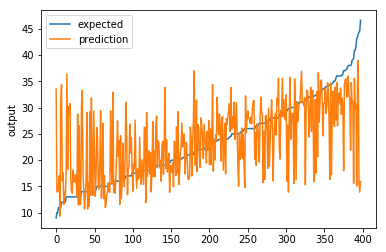

In [0]:
chart_regression(oos_pred[0].values, oos_y[0].values, sort=True)